<a href="https://colab.research.google.com/github/lmillana/MasterProjects/blob/main/Python/Impacto%20Covid%20Espa%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introducción**

En este proyecto se va a realizar un análisis de datos sencillo de las hospitalizaciones de UCI en España producidas por el Covid 19.

##**Etapas del Análisis de Datos**

1. Importar módulos de Python
2. Obtención de datos
3. Gestión de Datos (Data Wrangling)
4. Análisis exploratorio de datos (EDA) y visualización
5. Conclusiones



## **1. Importar los módulos de Python**

En este proyecto trabajaremos principalmente con tres módulos de Python que ya conocemos:

* Pandas
* matplotlib, concretamente con el paquete pyplot
* Numpy

In [ ]:
#Importa los módulos y paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **2. Obtención de datos**

Para realizar un análisis de datos es necesario obtener dichos datos, siendo a veces el mayor problema. En este caso, el instituto Carlos III ya ha realizado una gran labor obteniendo dichos datos, que puedes [ver y descargar aquí ](https://drive.google.com/file/d/1kbnilQHl3cT8BliwvVRshyP2dicM2Ugy/view?usp=sharing) en formato CSV.

Añade el archivo csv al colab (esto puede tardar unos minutos) y crea el dataframe df con los datos que contiene.

Visualiza las primeras 5 filas para ver la estructura del dataframe.

In [ ]:
df = pd.read_csv('casos_covid.csv')
df.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


##**3. Gestión de Datos (Data Wrangling)**

En esta etapa, los datos se ven modificados para que sea más fácil realizar un posterior análisis y visualización. Las modificaciones más comunes que pueden sufrir los datos son limpieza, transformación, combinación y redimensionado.

Antes de realizar cualquier tipo de modificación de los datos, es recomendable analizar sus columnas, valores nulos, número de filas, tipos de datos, etc.


In [ ]:
# Columnas del DataFrame
df.columns


Index(['provincia_iso', 'sexo', 'grupo_edad', 'fecha', 'num_casos', 'num_hosp',
       'num_uci', 'num_def'],
      dtype='object')

In [ ]:
# Número de filas y columnas
df.shape

(498173, 8)

Comprueba qué tipo de datos contiene cada columna, y si contiene valores nulos.

In [ ]:
# Tipo de datos por columna
df.dtypes


provincia_iso     object
sexo              object
grupo_edad        object
fecha             object
num_casos        float64
num_hosp         float64
num_uci          float64
num_def          float64
dtype: object

In [ ]:
# Columnas con valores nulos
df.isnull().sum()

provincia_iso    9390
sexo                0
grupo_edad          0
fecha               1
num_casos           1
num_hosp            1
num_uci             1
num_def             1
dtype: int64

Crea una lista con los valores únicos de la columna 'provincia_iso'. Estos valores se refieren a las iniciales de las provincias.

In [ ]:
df['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', nan, 'NC', 'O',
       'OR', 'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T',
       'TE', 'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

Haz lo mismo para el género.

In [ ]:
df['sexo'].unique()

array(['H', 'M', 'NC'], dtype=object)

Y para el grupo de edad.

In [ ]:
df['grupo_edad'].unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'NC'], dtype=object)

¿De cuantos días contiene datos el dataset?

In [ ]:
df['fecha'].nunique()

860

En cuanto al resto de columnas, no tiene sentido analizarlas de esta forma, pues son valores dados de ingresos, UCIs, muertes y contagios para cada grupo de provincia,sexo, fecha y edad.

Tras analizar los datos, se concluye que no es necesaria realizar ninguna transformación. Esto es debido a que no hay que limpiar, rellenar o imputar datos porque no hay datos vacíos ni nulos ni duplicados en ninguna de las columnas. En caso de que existieran, podrían interferir en el análisis y habría que tener diferentes estrategias según la cantidad y el tipo de datos.

##**4. Análisis Exploratorio de Datos (EDA) y Visualización**

Una vez se ha analizado la estructura de los datos y se ha decidido cómo gestionarlos, el siguiente paso a realizar y el más emocinante es un análisis exploratorio de datos. Antes de realizar esto, es conveniente hacerse algunas preguntas. Algunas preguntas concretas para este caso, partiendo de los datos podrían ser:
* ¿Hay diferencias en los contagios/UCI/muertes entre edad?
* ¿Hay diferencias en los contagios/UCI/muertes entre sexo?
* ¿Hay diferencias en los contagios/UCI/muertes entre provincias?
* ¿Quién tiene más probabilidad de acabar en UCI por género? Y por edad?

Una vez aclarado qué queremos obtener, procedemos a realizar el análisis de datos.

**Evolución de la pandemia**

En este caso, queremos mostrar en una línea temporal, el número de Contagios, Hospitalizaciones, Ingresos UCI y Defunciones totales, es decir la suma de cada provincia, para cada fecha.

Muestra las 4 gráficas en un mismo área unas encima de otras, con un tamaño de gráfico de 10x14.

In [ ]:
df.columns

Index(['provincia_iso', 'sexo', 'grupo_edad', 'fecha', 'num_casos', 'num_hosp',
       'num_uci', 'num_def'],
      dtype='object')

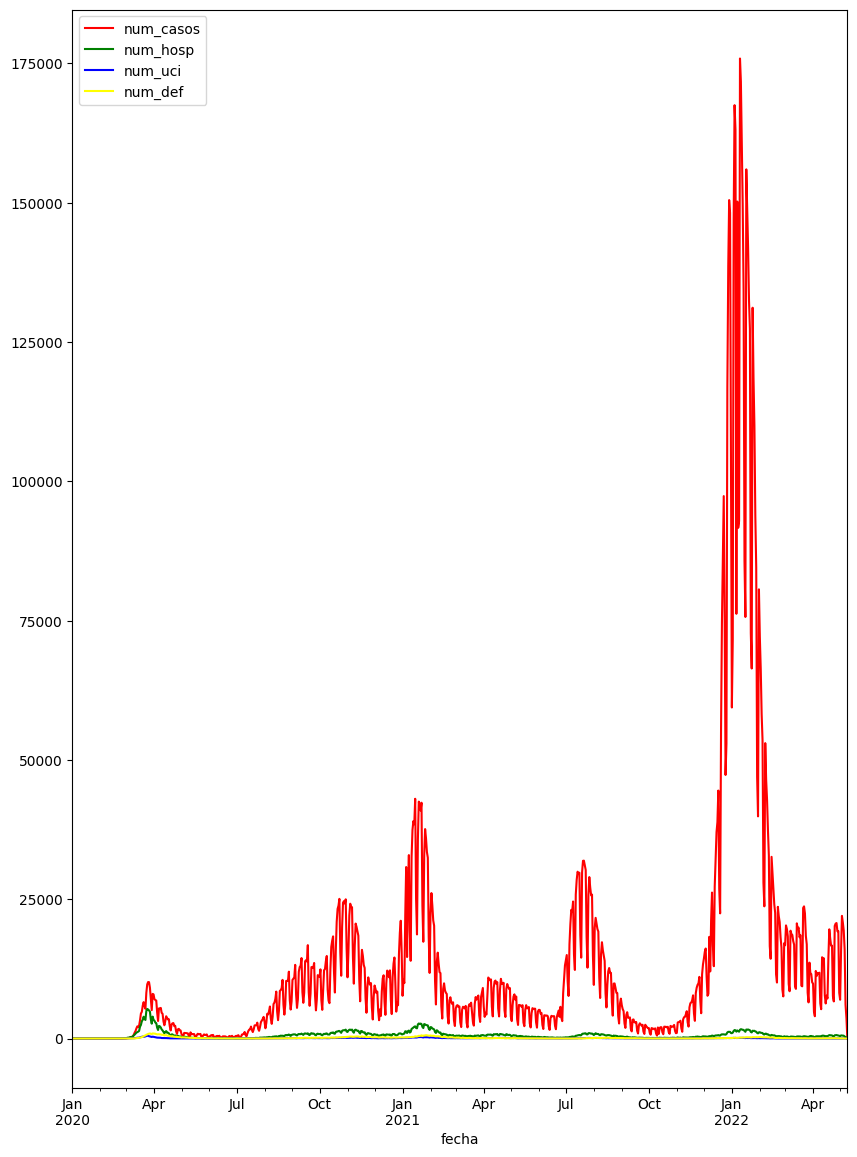

In [ ]:
plt.figure(figsize=(10,14))

# Pasamos las fechas a formato datetime:
df['fecha'] = pd.to_datetime(df['fecha'])

num_casos = df.groupby('fecha')['num_casos'].sum() #Numero de casos
num_casos.plot(label='num_casos', color='red')

num_hosp = df.groupby('fecha')['num_hosp'].sum() #Hospitalizaciones
num_hosp.plot(label='num_hosp', color='green')

num_uci = df.groupby('fecha')['num_uci'].sum() #Casos UCI
num_uci.plot(label='num_uci', color='blue')

num_def = df.groupby('fecha')['num_def'].sum() #Numero de defunciones
num_def.plot(label='num_def', color='yellow')

plt.legend()
plt.show()

#Pregunta 1

¿En qué peridodo se produjeron menos contagios?

a) Invierno 2020-2021

b) Primavera 2020

c) Verano 2020

d) Otoño 2020

Almacena la letra de la respuesta correcta en la variable solucion_1.

¿El resto de gráficas muestran la misma tendencia? Responde con un booleano en la variable solucion_1b

In [ ]:
solucion_1= 'c' #Primavera-verano pero más cercano a verano

solucion_1b= 'False'

**Comparación de la evolución de la pandemia en Barcelona y Madrid**

Vuelve a realizar las gráficas de lineas temporales para los contagios, hospitalizaciones, ingresos UCI y defunciones, pero esta vez representa en cada uno, superpuestos los datos de Barcelona y Madrid. Utiliza el parámetro alpha al 0.5.

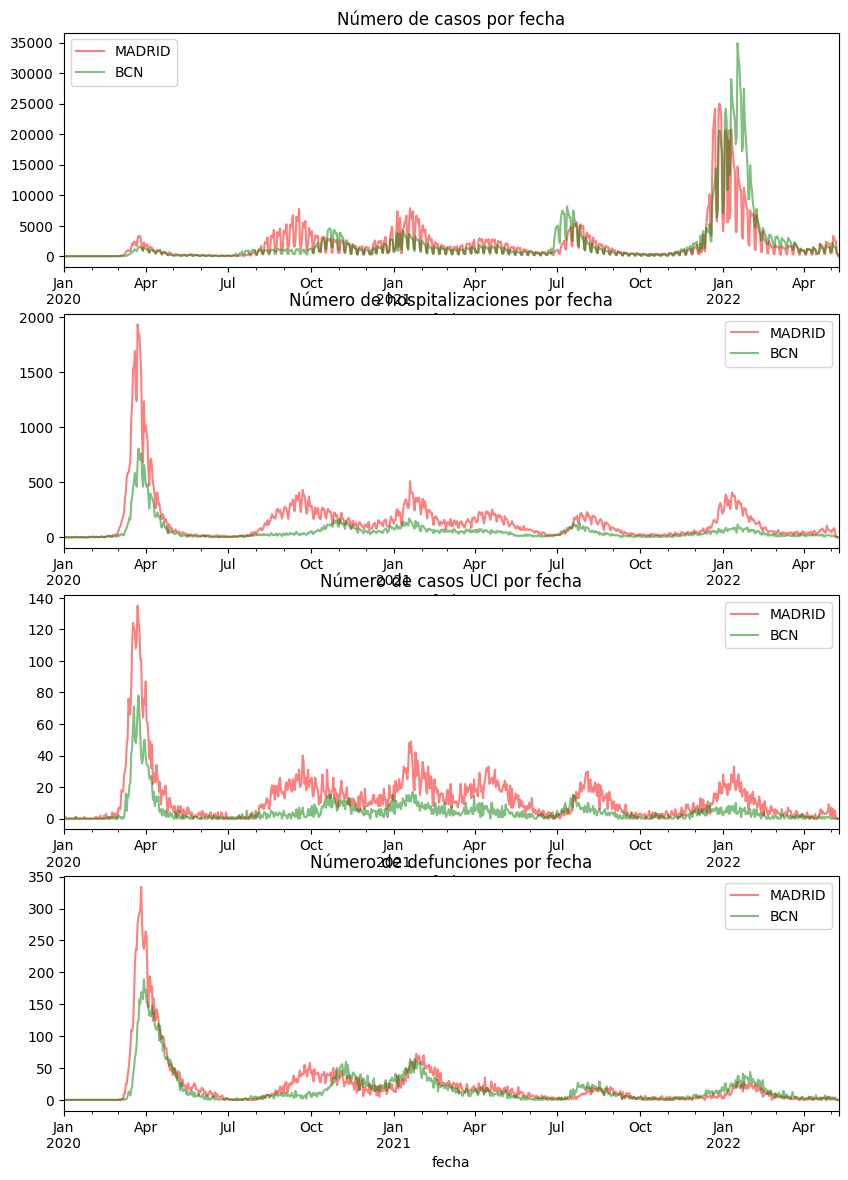

In [ ]:
plt.figure(figsize=(10,14))

# MADRID : M
# BARCELONA: B

madrid = df[df['provincia_iso'] == 'M']
bcn = df[df['provincia_iso'] == 'B']

plt.subplot(4,1,1) #Numero de casos / contagios
num_casos_M = madrid.groupby('fecha')['num_casos'].sum()
num_casos_M.plot(label='MADRID', color='red', alpha=0.5)
num_casos_B = bcn.groupby('fecha')['num_casos'].sum()
num_casos_B.plot(label='BCN', color='green', alpha=0.5)
plt.title('Número de casos por fecha')
plt.legend()

plt.subplot(4,1,2) #Hospitalizaciones

num_hosp_M = madrid.groupby('fecha')['num_hosp'].sum()
num_hosp_M.plot(label='MADRID', color='red', alpha=0.5)
num_hosp_B = bcn.groupby('fecha')['num_hosp'].sum()
num_hosp_B.plot(label='BCN', color='green', alpha=0.5)
plt.title('Número de hospitalizaciones por fecha')
plt.legend()

plt.subplot(4,1,3) #UCI
num_uci_M = madrid.groupby('fecha')['num_uci'].sum()
num_uci_M.plot(label='MADRID', color='red', alpha=0.5)
num_uci_B = bcn.groupby('fecha')['num_uci'].sum()
num_uci_B.plot(label='BCN', color='green', alpha=0.5)
plt.title('Número de casos UCI por fecha')
plt.legend()

plt.subplot(4,1,4) #Defunciones
num_def_M = madrid.groupby('fecha')['num_def'].sum()
num_def_M.plot(label='MADRID', color='red', alpha=0.5)
num_def_B = bcn.groupby('fecha')['num_def'].sum()
num_def_B.plot(label='BCN', color='green', alpha=0.5)
plt.title('Número de defunciones por fecha')
plt.legend()


plt.show()




Responde con 'Barcelona' o 'Madrid' en la variable solucion_2 cual ha sido la ciudad con mayor pico de hospitalizaciones por el Covid según las conclusiones sacadas de los gráficos.

Responde, en la variable solucion_2b, con 'Barcelona' o 'Madrid' cual ha tenido el mayor pico de contagios.

In [ ]:
solucion_2= 'Madrid'

solucion_2b= 'Barcelona'

**Muertes absolutas por sexo**

Representa con un gráfico de tarta las muertes totales según el género.

Utiliza como etquetas la lista de valores únicos de la columna 'sexo' y como formato de valor del número dentro del gráfico '%.2f%%'.

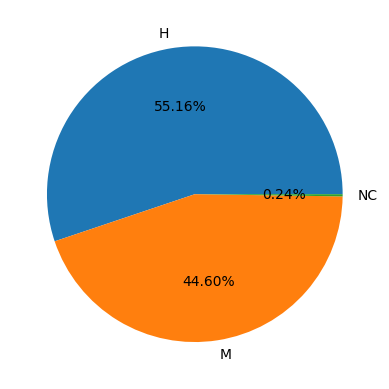

In [ ]:
sex = ['H', 'M', 'NC']
data = df.groupby('sexo')['num_def'].sum()

plt.pie(data, labels=sex, autopct='%.2f%%')
plt.show()

Completa la cadena de texto de la variable solucion_3 con los datos visualizados en el gráfico (H,M o NC) y (xx.xx%).

In [ ]:
solucion_3='El género con más defunciones es H con 55.16%' #sustituye las _ por el dato correspondiente

**Provincia más afectada**

In [ ]:
# Quitamos Madrid & Barcelona
provincias = df[(df['provincia_iso']!= 'M') & (df['provincia_iso']!= 'B')]

casos = provincias.groupby('provincia_iso')['num_casos'].sum()
casos.idxmax()


'V'

¿Cuál es la provincia, sin contar Madrid y Barcelona, con más contagios? Almacena en la solucion_3 el valor correspondiente de la columna 'provincia_iso' (Ej. 'M').

In [ ]:
solucion_4= 'V'

**Grupo de edad más afectado**

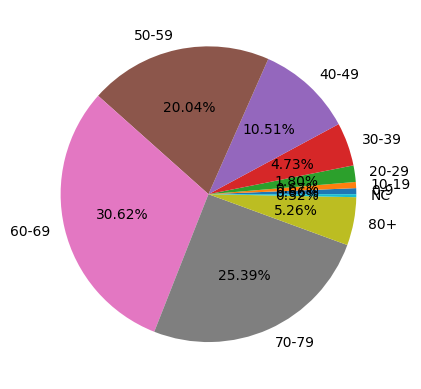

In [ ]:
data = df.groupby('grupo_edad')['num_uci'].sum()

plt.pie(data, labels=data.index, autopct='%.2f%%')
plt.show()

¿Qué rango de edad sufrió más ingresos UCI? Almacena en la variable solucion_5 el rango de edad como cadena de texto (ej. '0-9')

In [ ]:
solucion_5= '60-69'

In [ ]:
#@title Ejecuta para obtener el token
import hashlib

correct = str(solucion_1)+ str(solucion_2)+ str(solucion_2b)+ str(solucion_3)+ str(solucion_4)+ str(solucion_5)
pwd = hashlib.sha256(str(correct).encode())
#print('El token para corregir en Nodd3r es:\n',pwd.hexdigest())

if pwd.hexdigest()[0:6] == '2b9bad':
  print('¡Felicidades! puedes avanzar al siguiente modulo \n El token es: ',pwd.hexdigest())
else:
  print('Hay algún error en el código o tu forma es diferente a la planteada, pregunta por el foro si no lo ves claro.')

¡Felicidades! puedes avanzar al siguiente modulo 
 El token es:  2b9bad03515da79f6a2b727c7f8dd0aadbc860b6fe3b6020830f26a088b0eecf


#Pregunta Bonus

¿Crees que la suma de contagios en Madrid y Barcelona juntos fue mayor que la del resto de provincias de España?

Genera un gráfico con dos barras horizontales acumuladas. Una de ellas con Madrid y Barcelona y la otra con el resto de España (Debe ser diferenciable la aportación de cada provincia a la barra).

In [ ]:
# Madrid & Barcelona
mad_bcn = df[(df['provincia_iso']== 'M') | (df['provincia_iso']== 'B')]
# Resto de provincias
provincias = df[(df['provincia_iso']!= 'M') & (df['provincia_iso']!= 'B')]


casos_mad_bcn = mad_bcn['num_casos'].sum() # Casos en Madrid & Barcelona
resto_casos = provincias['num_casos'].sum() # Casos en el resto de provincias

print('Madrid & Barcelona:', casos_mad_bcn)
print('Resto de provincias:', resto_casos)

Madrid & Barcelona: 3487192
Resto de provincias: 8597935


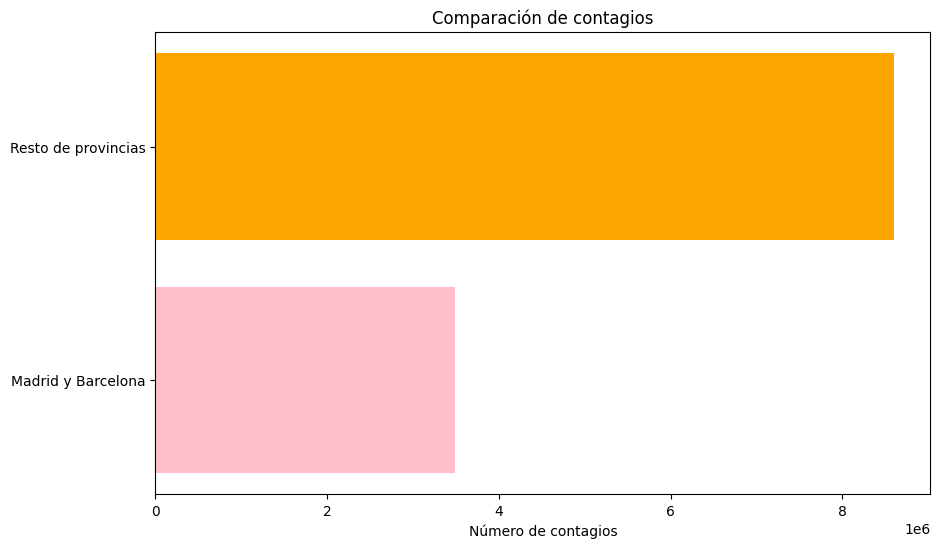

In [ ]:
## NIVEL BÁSICO: Sin diferenciarse la aportación de cada provincia a la barra.
plt.figure(figsize=(10, 6))
plt.barh(['Madrid y Barcelona'], casos_mad_bcn, color = 'pink')
plt.barh('Resto de provincias', resto_casos, color = 'orange')
plt.xlabel('Número de contagios')
plt.title('Comparación de contagios')
plt.show()

Colab de un compañero donde se diferencia cada provincia:

> [Impacto Covid España](https://colab.research.google.com/drive/1BCBFMJ4LTfiXvPSRfYwRd7jH57F1jWgw?usp=sharing)